In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [33]:
clf = tree.DecisionTreeClassifier() #object of DTC


In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target)
clf = clf.fit(X_train,y_train)

[Text(418.5, 509.625, 'X[27] <= 0.136\ngini = 0.469\nsamples = 426\nvalue = [160, 266]'),
 Text(279.0, 441.675, 'X[23] <= 960.5\ngini = 0.112\nsamples = 269\nvalue = [16, 253]'),
 Text(209.25, 373.725, 'X[13] <= 91.555\ngini = 0.038\nsamples = 256\nvalue = [5, 251]'),
 Text(174.375, 305.775, 'X[20] <= 16.805\ngini = 0.031\nsamples = 255\nvalue = [4, 251]'),
 Text(104.625, 237.825, 'X[14] <= 0.003\ngini = 0.008\nsamples = 246\nvalue = [1, 245]'),
 Text(69.75, 169.875, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(34.875, 101.92500000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(104.625, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 169.875, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(244.125, 237.825, 'X[11] <= 0.821\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(209.25, 169.875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(279.0, 169.875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(244.125, 305.

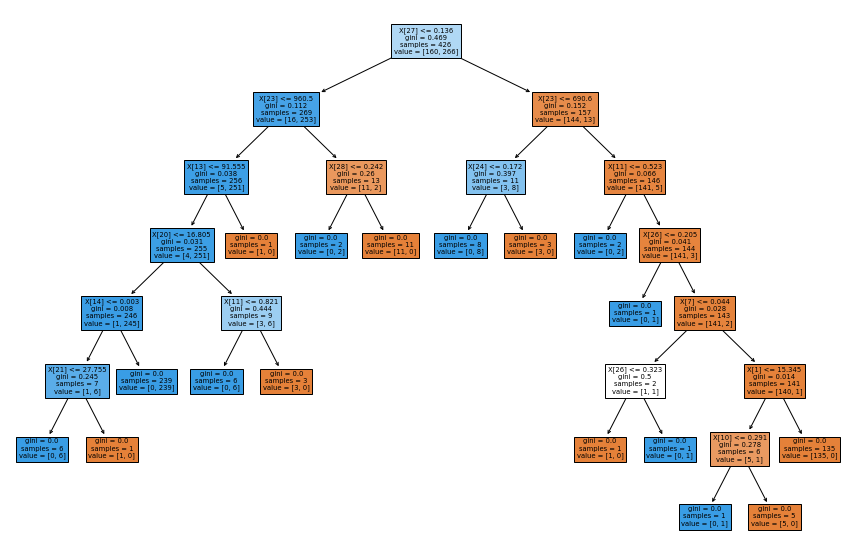

In [35]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled="True")

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9020979020979021

In [38]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [39]:
ccp_alphas

array([0.        , 0.00231459, 0.00233788, 0.00453273, 0.00611332,
       0.00794511, 0.00887919, 0.01024328, 0.02306564, 0.03968862,
       0.34241413])

In [40]:
from sklearn.tree import DecisionTreeClassifier
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3424141280275005


# Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

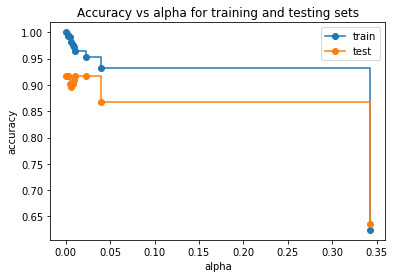

In [41]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.916083916083916

[Text(418.5, 453.0, 'X[27] <= 0.136\ngini = 0.469\nsamples = 426\nvalue = [160, 266]'),
 Text(209.25, 271.8, 'X[23] <= 960.5\ngini = 0.112\nsamples = 269\nvalue = [16, 253]'),
 Text(104.625, 90.59999999999997, 'gini = 0.038\nsamples = 256\nvalue = [5, 251]'),
 Text(313.875, 90.59999999999997, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(627.75, 271.8, 'X[23] <= 690.6\ngini = 0.152\nsamples = 157\nvalue = [144, 13]'),
 Text(523.125, 90.59999999999997, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(732.375, 90.59999999999997, 'gini = 0.066\nsamples = 146\nvalue = [141, 5]')]

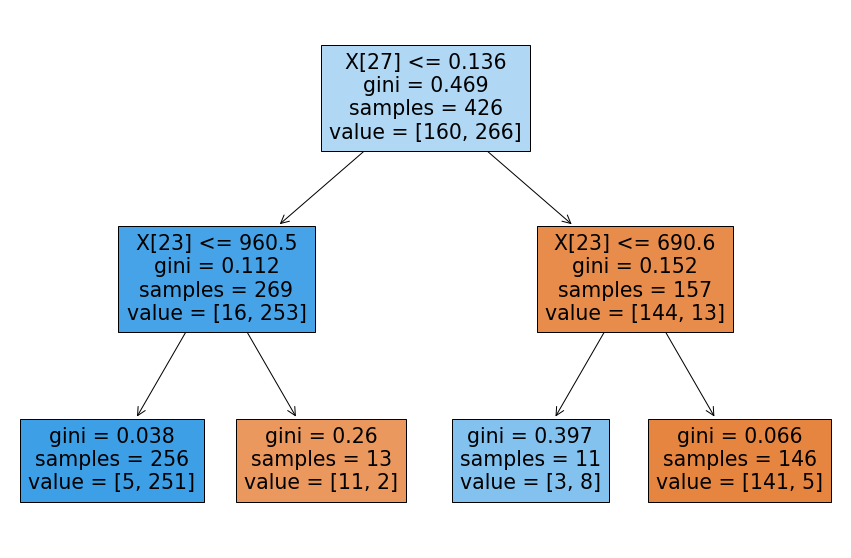

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)